# Word Cloud for Elon Musk’s Shadow Rule article 

Check and install libraries if needed

In [1]:
# python 3.10.4

# beautifulsoup4            4.12.2 
# requests                  2.31.0
# pillow                    10.0.0
# numpy                     1.25.2
# matplotlib-base           3.7.2
# scipy                     1.11.2 
# wordcloud                 1.9.2

# !conda install -c anaconda beautifulsoup4 -y
# !conda install -c conda-forge requests -y
# !conda install -c conda-forge pillow -y
# !conda install -c conda-forge numpy -y
# !conda install -c conda-forge matplotlib-base -y
# !conda install -c conda-forge scipy -y
# !conda install -c conda-forge wordcloud -y

# !conda list | grep 'beautifulsoup4'
# !conda list | grep 'requests'
# !conda list | grep 'pillow'
# !conda list | grep 'numpy'
# !conda list | grep 'matplotlib-base'
# !conda list | grep 'scipy'
# !conda list | grep 'wordcloud'

Download the text, clean it and prepare it for Word Cloud

In [3]:
import requests
from bs4 import BeautifulSoup as bs

url = 'https://www.newyorker.com/magazine/2023/08/28/elon-musks-shadow-rule?currentPage=all'
response = requests.get(url)
soup = bs(response.text, 'html.parser')

# get paragraphs
paragraphs = []
for paragraph in soup.find_all('p'):
    paragraphs.append(str(' '.join(paragraph.text.split())))

# throw away paragraphs we don't need
paragraphs = paragraphs[3:18]

# combine text from paragraphs
text = ' '.join(paragraphs)

Build and display Word Cloud

(-0.5, 746.5, 746.5, -0.5)

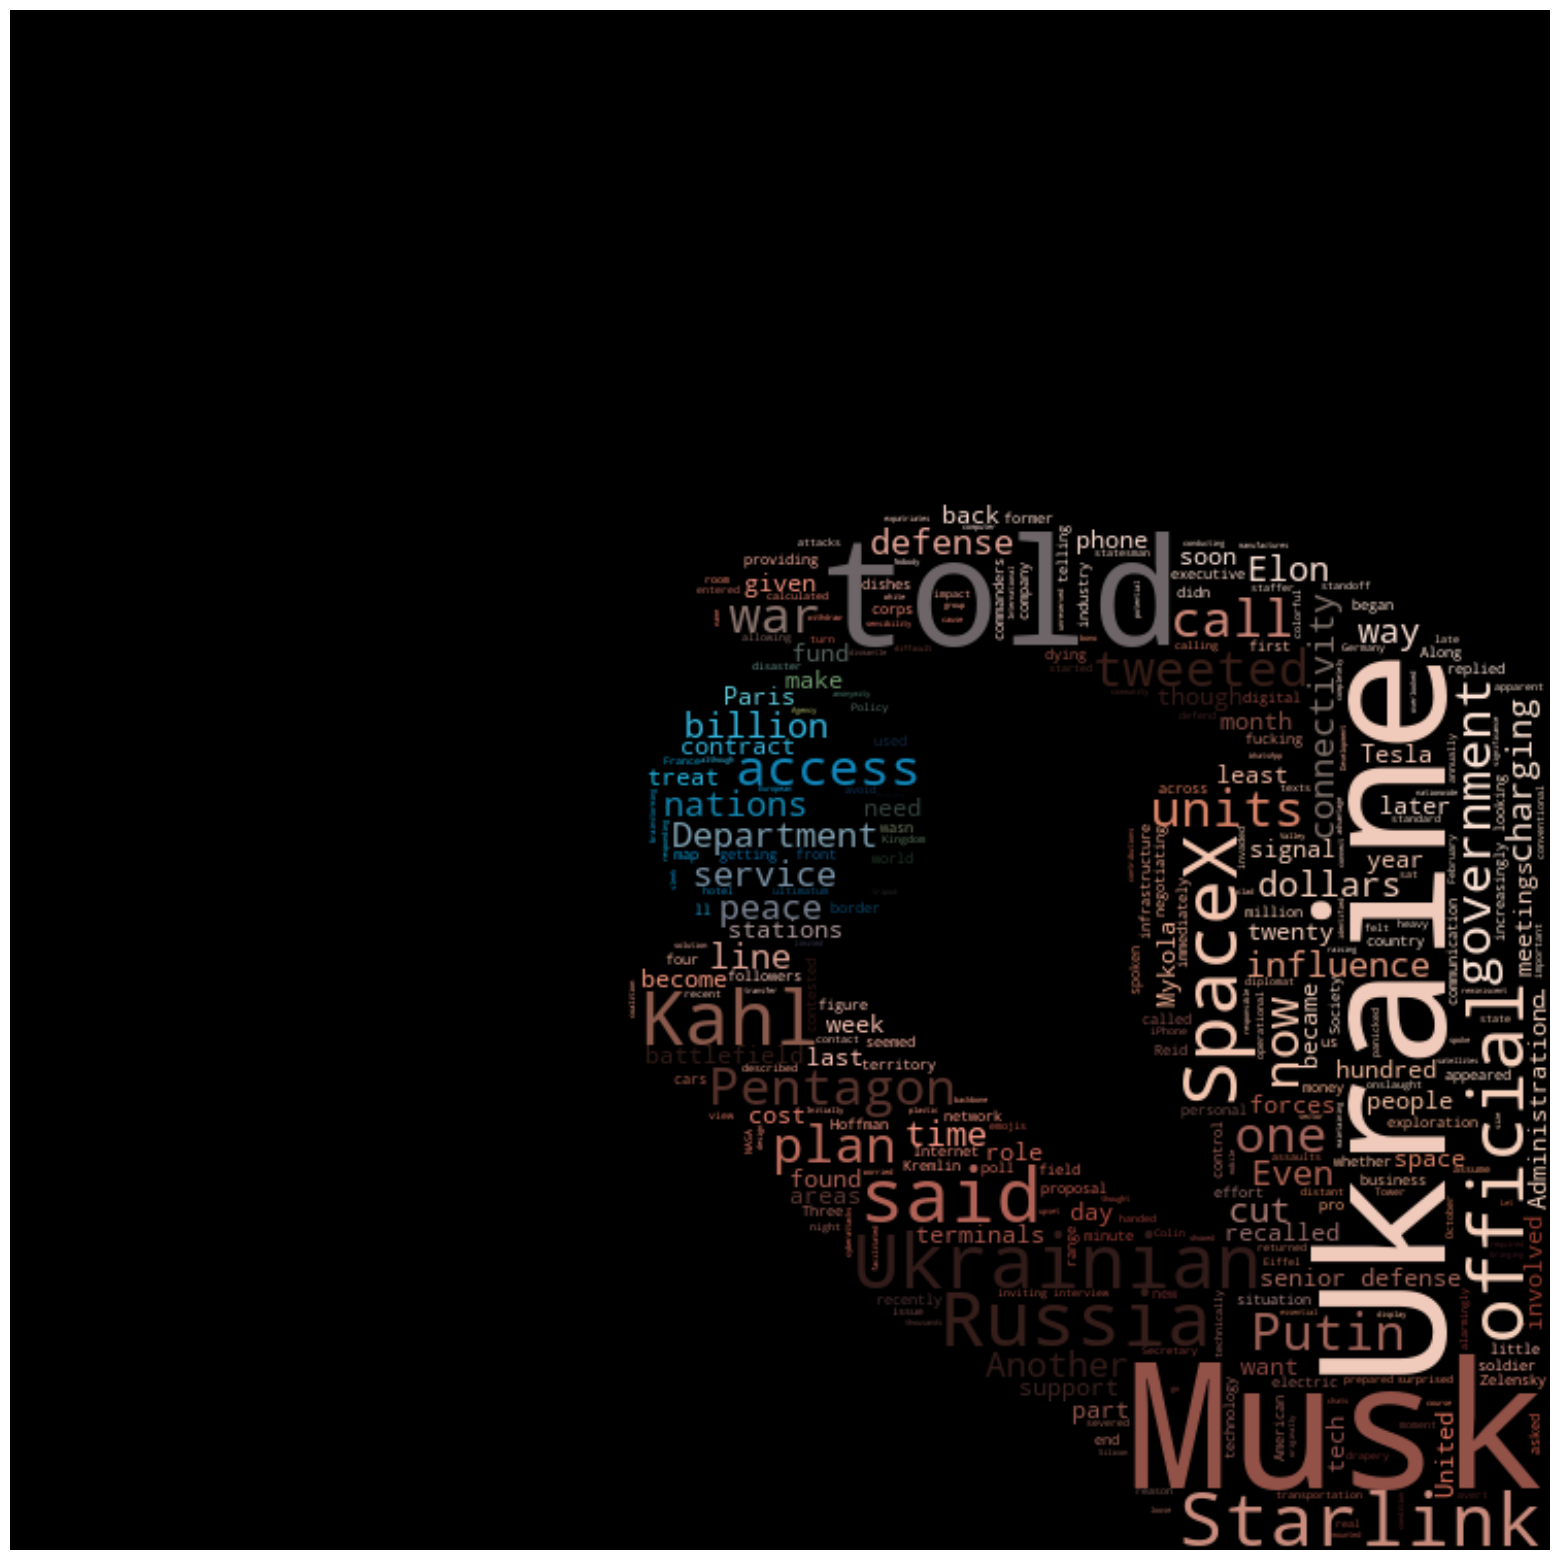

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# picture form internet
# picture = requests.get('https://media.newyorker.com/photos/64dff62f6fc77c5d2e5d3529/master/w_2240,c_limit/230828_r42844web-story.jpg', stream=True).raw

# local picture without background
picture = 'story.png'
pic_colours = np.array(Image.open(picture))
# make array smaller as it's still good enough for colour masking 
pic_colours = pic_colours[::3, ::3]

# create mask. white is "masked out"
pic_mask = pic_colours.copy()
pic_mask[pic_mask.sum(axis=2) == 0] = 255

# setup borders between colours for better view
edges = np.mean([gaussian_gradient_magnitude(pic_colours[:, :, i] / 255., 2) for i in range(3)], axis=0)
pic_mask[edges > .08] = 255  # custom

STOPWORDS = STOPWORDS | set(['S', 't', 'U'])
# create wc object using stopwords
wc = WordCloud(
    max_words=2000,
    mask=pic_mask,
    random_state=8,
    relative_scaling=0,
    background_color='black',
    stopwords=STOPWORDS)
wc.generate(text)

# plot colourised WordCloud
image_colors = ImageColorGenerator(pic_colours)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')